In [2]:
#add citation https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.mixture import GaussianMixture
import sys
sys.path.append('../')
from Util import loadBeer,loadWine,loadBeerRaw
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import time
from mpl_toolkits.mplot3d import axes3d, Axes3D

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
X_train, X_test, y_train, y_test= loadBeerRaw()
cols =[]
for x in range(1,6):
    cols.append('principal component ' + str(x))
encoder = LabelEncoder()
X_train['SugarScale'] = encoder.fit_transform(X_train['SugarScale']).astype(np.int32)
X_train=X_train[['OG','FG','ABV','IBU','Color','BoilSize','BoilTime','Efficiency','SugarScale','StyleID']]
X_test['SugarScale'] = encoder.fit_transform(X_test['SugarScale']).astype(np.int32)
X_test=X_test[['OG','FG','ABV','IBU','Color','BoilSize','BoilTime','Efficiency','SugarScale','StyleID']]
transformer = PCA(n_components=5)
principalComponents =transformer.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents,index=X_train.index
             , columns =cols)
scores =[]
models=[]
for k in range(1,15):
    gmm = GaussianMixture(n_components=k)
    scores.append(gmm.fit(X_train).score(X_train))    
    if k % 5 == 0:
        print("Training k = "+str(k)+" clusters...")
    models.append(gmm)


Training k = 5 clusters...
Training k = 10 clusters...


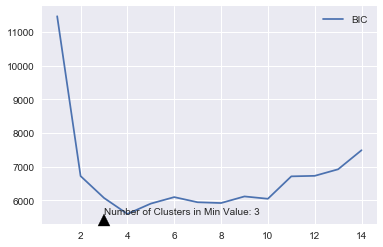

In [21]:
bicValues= [m.bic(X_train) for m in models]
minTest = min(bicValues)
minPos= bicValues.index(minTest)
plt.annotate('Number of Clusters in Min Value: '+str(minPos), xy=(minPos+1, minTest), xytext=(minPos, minTest+5),
        arrowprops=dict(facecolor='black', shrink=0.05),
        )
plt.plot( range(1,15),bicValues , label='BIC')

plt.legend()

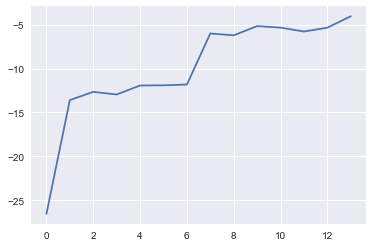

In [12]:
plt.plot(scores, label="score")

In [13]:
gmm = GaussianMixture(n_components=8)
gmm.fit(principalDf)
y_gmm = gmm.predict(principalDf)

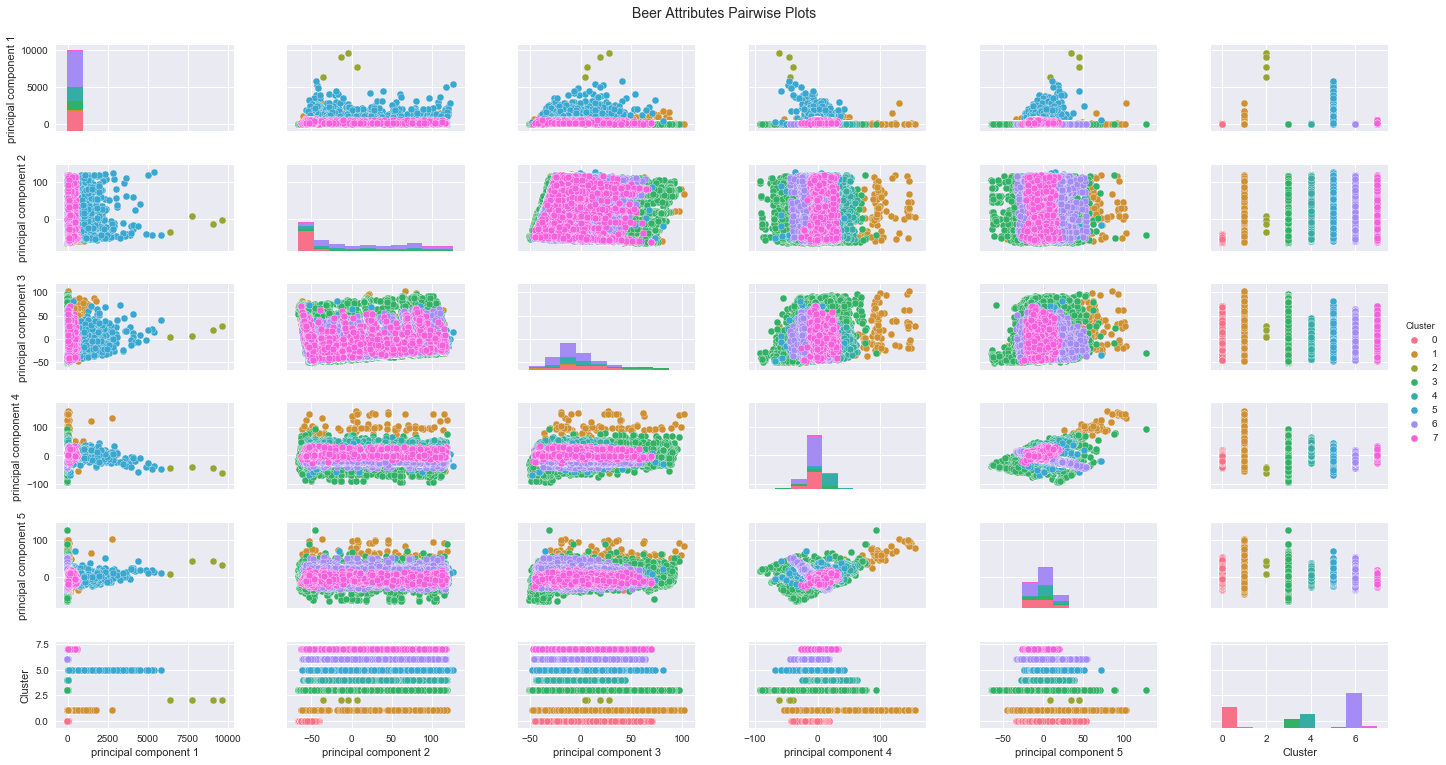

In [14]:
principalDf['Cluster'] =y_gmm
pp = sns.pairplot(principalDf, hue='Cluster', size=1.8, aspect=1.8)
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Beer Attributes Pairwise Plots', fontsize=14)

Text(0.5,0,'principal component 3')

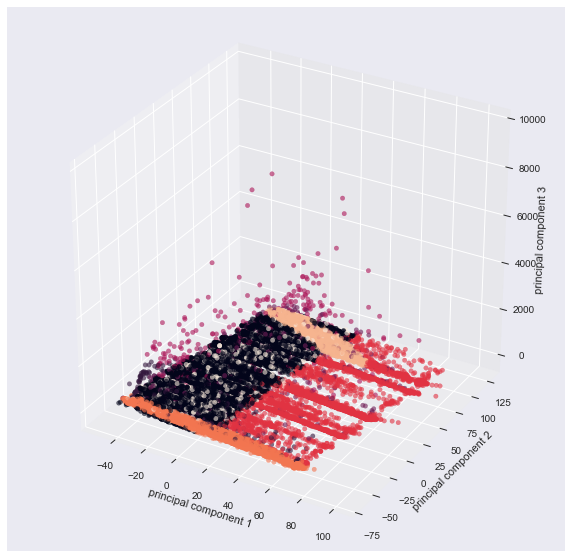

In [4]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
zs = principalDf[['principal component 1']].values.flatten()
ys = principalDf[['principal component 2']].values.flatten()
xs = principalDf[['principal component 3']].values.flatten()

ax.scatter(xs, ys,zs,  alpha=0.6, c=y_gmm)
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
ax.set_zlabel('principal component 3')

In [15]:
X_train, X_test, y_train, y_test= loadWine()
pca = PCA(n_components=4)
principalComponents =pca.fit_transform(X_train)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4'])
scores =[]
models=[]
for k in range(1,15):
    gmm = GaussianMixture(n_components=k)
    scores.append(gmm.fit(X_train).score(X_train))    
    if k % 5 == 0:
        print("Training k = "+str(k)+" clusters...")
    models.append(gmm)


Training k = 5 clusters...
Training k = 10 clusters...


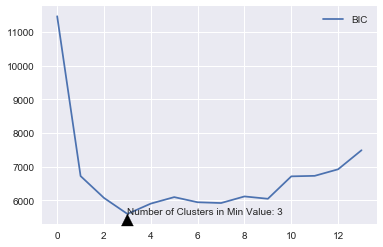

In [23]:
bicValues= [m.bic(X_train) for m in models]
minTest = min(bicValues)
minPos= bicValues.index(minTest)
plt.annotate('Number of Clusters in Min Value: '+str(minPos), xy=(minPos, minTest), xytext=(minPos, minTest+5),
        arrowprops=dict(facecolor='black', shrink=0.05),
        )
plt.plot( range(0,14),bicValues , label='BIC')

plt.legend()

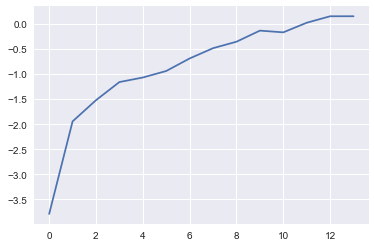

In [24]:
plt.plot(scores, label="score")

In [25]:
gmm = GaussianMixture(n_components=3)
gmm.fit(principalDf)
y_gmm = gmm.predict(principalDf)

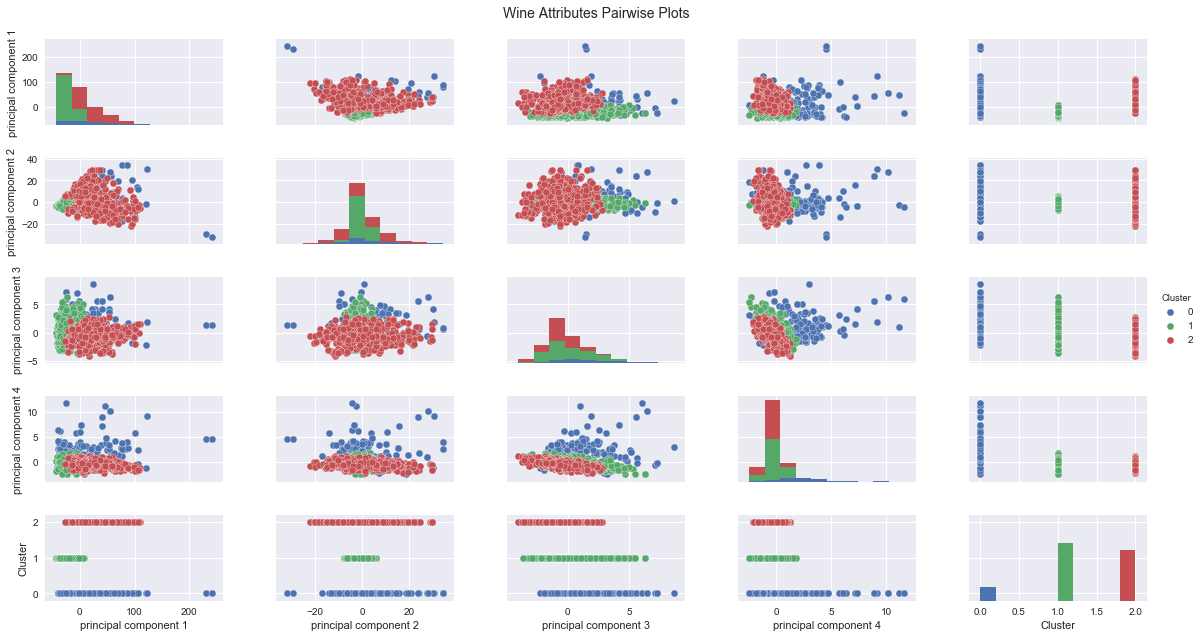

In [26]:
principalDf['Cluster'] =y_gmm
pp = sns.pairplot(principalDf, hue='Cluster', size=1.8, aspect=1.8)
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

Text(0.5,0,'principal component 3')

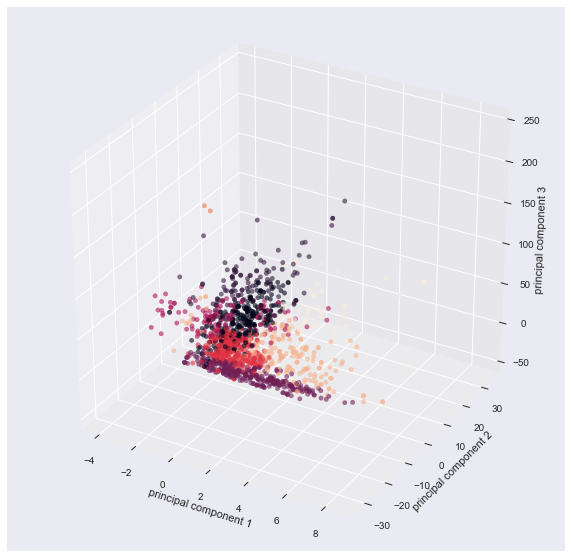

In [10]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
zs = principalDf[['principal component 1']].values.flatten()
ys = principalDf[['principal component 2']].values.flatten()
xs = principalDf[['principal component 3']].values.flatten()

ax.scatter(xs, ys,zs,  alpha=0.6, c=y_gmm)
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
ax.set_zlabel('principal component 3')